# Creando un poema con Keras


Natural Language Processing - Tokenization (NLP Zero to Hero - Part 1) : https://www.youtube.com/watch?v=fNxaJsNG3-s&list=PLQY2H8rRoyvzDbLUZkbudP-MFQZwNmU4S

El objetivo es crear un programa con tensorflow y keras, que genere textos coherentes de poesía mediante una red neuronal que prediga palabras en función de otras.

## 0 - Import de librerías generales y carga de textos

In [ ]:
import tensorflow 
from tensorflow import keras
import random
import numpy as np
import glob
import os
import re

In [ ]:
textos = []
# recorremos todos los archivos txt del directorio para extrar los textos
for file in glob.glob("*.txt"):
    f =  open(file)
    textos += [l for l in f.readlines()]
print(len(textos))
print(textos)

16000
['i didnt feel humiliated;sadness\n', 'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake;sadness\n', 'im grabbing a minute to post i feel greedy wrong;anger\n', 'i am ever feeling nostalgic about the fireplace i will know that it is still on the property;love\n', 'i am feeling grouchy;anger\n', 'ive been feeling a little burdened lately wasnt sure why that was;sadness\n', 'ive been taking or milligrams or times recommended amount and ive fallen asleep a lot faster but i also feel like so funny;surprise\n', 'i feel as confused about life as a teenager or as jaded as a year old man;fear\n', 'i have been with petronas for years i feel that petronas has performed well and made a huge profit;joy\n', 'i feel romantic too;love\n', 'i feel like i have to make the suffering i m seeing mean something;sadness\n', 'i do feel that running is a divine experience and that i can expect to have some type of spiritual encounter;joy\n', 'i 

## 1 - Tokenización y preprocesamiento de texto

 Los inputs para el entrenamiento del modelo serán cadenas de texto (frases), y serán de tamaño fijo, teniendo el vocabulario de entrenamiento un tamaño limitado. Debemos transformar los textos en vectores numéricos codificando las palabras individuales del texto.

 Keras implementa la clase Tokenizer de preprocessin/text con varios métodos útiles predefinidos.
 


In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [ ]:
# creamos el tokenizador sin límite de palabras
tkn = Tokenizer()

# ajustamos a los textos
tkn.fit_on_texts(textos)

# ya tenemos nuestro vocabulario indexado
w_idx = tkn.word_index
idx_w = {v:k for k,v in w_idx.items()}
print(len(w_idx),w_idx)

15212 {'i': 1, 'feel': 2, 'and': 3, 'to': 4, 'the': 5, 'a': 6, 'joy': 7, 'feeling': 8, 'that': 9, 'of': 10, 'sadness': 11, 'my': 12, 'in': 13, 'it': 14, 'like': 15, 'so': 16, 'for': 17, 'im': 18, 'me': 19, 'but': 20, 'was': 21, 'have': 22, 'anger': 23, 'is': 24, 'this': 25, 'am': 26, 'with': 27, 'fear': 28, 'not': 29, 'love': 30, 'about': 31, 'be': 32, 'as': 33, 'on': 34, 'you': 35, 'just': 36, 'at': 37, 'when': 38, 'or': 39, 'all': 40, 'because': 41, 'more': 42, 'do': 43, 'can': 44, 'really': 45, 'up': 46, 't': 47, 'are': 48, 'by': 49, 'very': 50, 'know': 51, 'been': 52, 'if': 53, 'out': 54, 'myself': 55, 'time': 56, 'how': 57, 'what': 58, 'get': 59, 'little': 60, 'had': 61, 'now': 62, 'will': 63, 'from': 64, 'being': 65, 'they': 66, 'people': 67, 'them': 68, 'would': 69, 'he': 70, 'want': 71, 'her': 72, 'some': 73, 'think': 74, 'one': 75, 'still': 76, 'ive': 77, 'surprise': 78, 'him': 79, 'even': 80, 'who': 81, 'an': 82, 'life': 83, 'its': 84, 'make': 85, 'there': 86, 'we': 87, 'bit'

In [ ]:
seq = tkn.texts_to_sequences(textos)
print(seq)

[[1, 143, 2, 682, 11], [1, 44, 105, 64, 8, 16, 498, 4, 16, 3495, 557, 36, 64, 65, 132, 152, 81, 1480, 3, 24, 1255, 11], [18, 3059, 6, 1149, 4, 290, 1, 2, 499, 442, 23], [1, 26, 169, 8, 668, 31, 5, 4157, 1, 63, 51, 9, 14, 24, 76, 34, 5, 3496, 30], [1, 26, 8, 1065, 23], [77, 52, 8, 6, 60, 525, 323, 332, 162, 165, 9, 21, 11], [77, 52, 333, 39, 7400, 39, 200, 7401, 890, 3, 77, 2474, 1384, 6, 163, 1885, 20, 1, 121, 2, 15, 16, 459, 78], [1, 2, 33, 443, 31, 83, 33, 6, 1686, 39, 33, 763, 33, 6, 197, 271, 378, 28], [1, 22, 52, 27, 5259, 17, 219, 1, 2, 9, 5259, 103, 5260, 139, 3, 136, 6, 1038, 4158, 7], [1, 2, 669, 98, 30], [1, 2, 15, 1, 22, 4, 85, 5, 736, 1, 97, 548, 308, 89, 11], [1, 43, 2, 9, 487, 24, 6, 534, 444, 3, 9, 1, 44, 922, 4, 22, 73, 842, 10, 1886, 3060, 7], [1, 74, 14, 94, 5, 5261, 56, 10, 197, 4, 2, 614, 23], [1, 2, 343, 460, 1, 97, 36, 4159, 11], [1, 22, 4160, 1687, 27, 5, 988, 263, 20, 33, 6, 891, 7402, 1613, 195, 4, 168, 56, 4, 229, 13, 5, 3061, 10, 83, 3, 27, 100, 1771, 10, 82,

Para comparar frases de diferente longitud, o tener muestras con el mismo número de variables/columnas hace falta rellenar a 0's las posiciones de los strings más cortos. Se coge la longitud más larga como tamaño máximo (número inicial de columnas)

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

padded = np.array(pad_sequences(seq, padding='pre',maxlen=len(w_idx)))
s = padded.shape

In [ ]:
print(padded.shape)
print('Hay actualmente ',s[0],' frases de muestra')
print('El vocabulario actualmente tiene una longitud de ',s[1])

(16000, 15212)
Hay actualmente  16000  frases de muestra
El vocabulario actualmente tiene una longitud de  15212


Las opciones de la función de padding son realizar el rellanado a 0's en las columnas de mayor índice (padding='post'), y dar una anchura máxima de palabra distinta de la encontrada en los textos (maxlen=5)

## 2 - Separación de datos para entrenamiento

In [ ]:
# train_s, test_s, val_s
T_SIZE = 3500
train_x, labels = padded[:T_SIZE,:-1],padded[:T_SIZE,-1]

In [ ]:
print('Primera muestra:',train_x[0])
print('Texto: ',[ idx_w[w] for w in train_x[0] if w != 0])
print('Categoría',idx_w[labels[0]])

Primera muestra: [  0   0   0 ... 143   2 682]
Texto:  ['i', 'didnt', 'feel', 'humiliated']
Categoría sadness


## 3 -Creando el modelo

Código del modelo sacado de la clase de TF

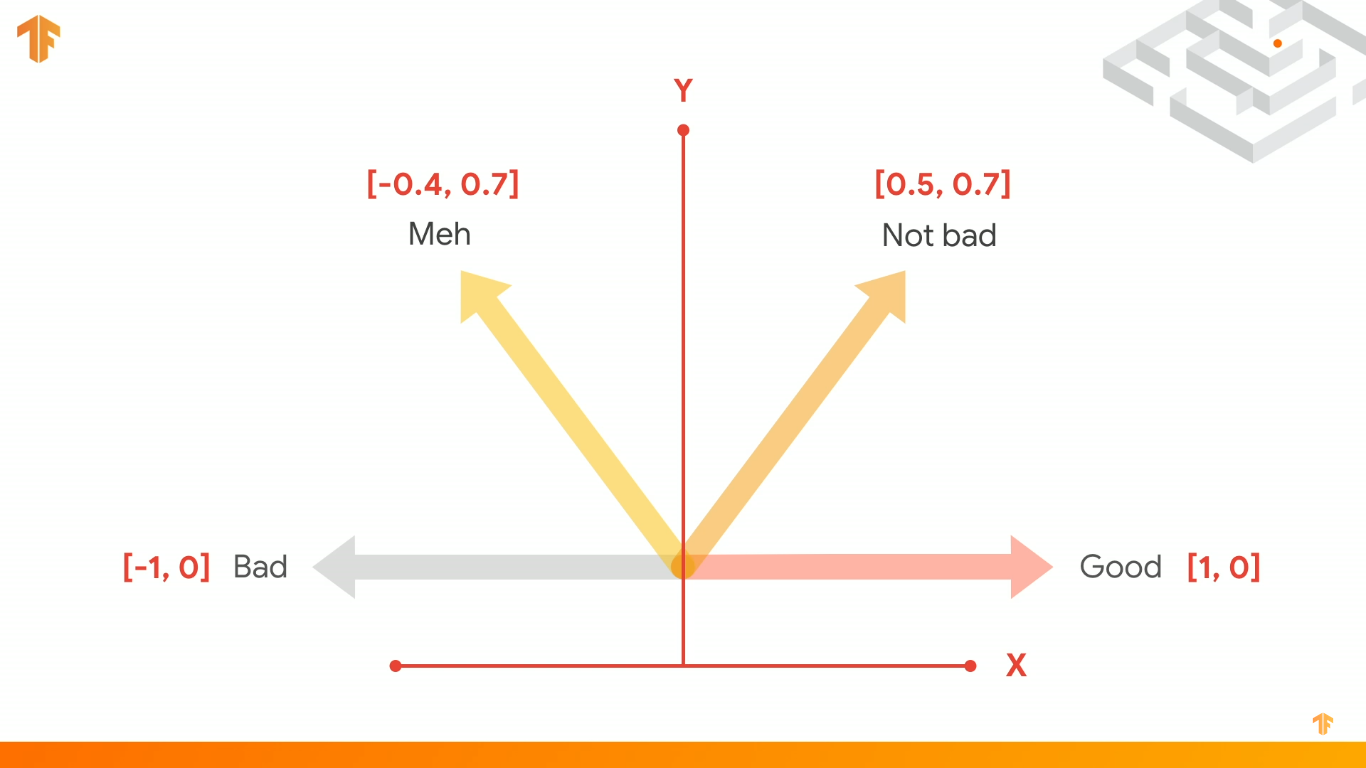

In [ ]:
#train_y = tensorflow.keras.utils.to_categorical(labels) 
train_y = tensorflow.keras.utils.to_categorical(labels)
print(train_x.shape)
print(train_y.shape)


(3500, 15211)
(3500, 79)


In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Embedding,Reshape, Bidirectional,LSTM, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
model = Sequential([
    Embedding(input_dim=train_x.shape[1],output_dim=200),
    Bidirectional(LSTM(units=150,kernel_regularizer=regularizers.L1(l1=0.01))),
    Dense(units=train_y.shape[1],activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy',  metrics=['accuracy'])
model.build()

In [ ]:
#tensorflow.keras.utils.plot_model(model)

In [ ]:
history = model.fit(train_x, train_y, epochs=2, verbose=1)

Epoch 1/2
110/110 [==============================] - 141s 1s/step - loss: 30.6463 - accuracy: 0.3123
Epoch 2/2
110/110 [==============================] - 139s 1s/step - loss: 1.9211 - accuracy: 0.3294


In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, None, 200)         3042200   
                                                                 
 bidirectional_4 (Bidirectio  (None, 300)              421200    
 nal)                                                            
                                                                 
 dense_4 (Dense)             (None, 79)                23779     
                                                                 
Total params: 3,487,179
Trainable params: 3,487,179
Non-trainable params: 0
_________________________________________________________________


## 4 - Evaluación y testeo del modelo



In [ ]:
test_x, test_l = padded[T_SIZE:T_SIZE+500,:-1],padded[T_SIZE:T_SIZE+500,-1]
test_y = tensorflow.keras.utils.to_categorical(test_l)


In [ ]:
print(test_x.shape)
print(test_y.shape)

(500, 15211)
(500, 79)


In [ ]:
model.evaluate(
    x=test_x,
    y=test_y,
    verbose=1
)

16/16 [==============================] - 8s 463ms/step - loss: 1.9093 - accuracy: 0.3400


[1.9092639684677124, 0.3400000035762787]

In [ ]:
sample_text = 'I am very very angry with you'
tkn2 = Tokenizer()
tkn2.fit_on_texts([sample_text])
dw = tkn2.word_index

In [ ]:
input = np.array([w_idx[k] for k in dw.keys()])
print(input)

[ 50   1  26 268  27  35]


In [ ]:
padded = np.array(pad_sequences([input],maxlen=len(w_idx)))
print(padded.shape)
print(padded)

(1, 15212)
[[  0   0   0 ... 268  27  35]]


In [ ]:
p = model.predict(padded)
print(p.shape)

1/1 [==============================] - 1s 1s/step
(1, 79)


In [ ]:
idx = np.unravel_index(np.argmax(p), p.shape)

In [ ]:
print(idx)

(0, 7)
